# I. The Hadamard Test

## Explain how qubits work

0 and 1 ket stuff

measurements  (with probabilites)

superposition (+ and - states)
    why normalization factors 

## Single Qubit Gates

gates rotate particles to different bases

X, Z, Y, S

the dagger operation

## Control Gates

CNOT, phase gate ($R_\theta$)

## Hadmard Gate

If we represent the $|0\rangle$ and $|1\rangle$ states as vectors, we can see that the state $|0\rangle = \begin{pmatrix}1\\0\end{pmatrix}$ showing a $100\%$ chance of measuring $0$ with a $0\%$ chance of measuring 1 and the state $|1\rangle = \begin{pmatrix}0\\1\end{pmatrix}$ showing a $100\%$ probability of measuring $1$ and $0\%$ of measuring $0$. If we do the same with the Hadamard gate we see that $H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}$ thus effectively transforming any state into superposition.

Let's look at the affect of applying a Hadamard gate to a state $|0\rangle$:

$$|0\rangle  = \begin{pmatrix}1\\0\end{pmatrix} \qquad \qquad H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}$$

$$\xrightarrow{H} \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix} \begin{pmatrix}1\\0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{pmatrix}$$

Moving back into dirac notation we can see the affect of applying the Hadamard gate to the $|0\rangle$ state gives:

$$\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$$

This shows how the Hadmard gate can turn the $|0\rangle$ state into the "plus state" superposition where the magnitude of the probability of measuring $1$ or $0$ is the same and they are both positive. Looking at the affect of the same gate on the $|1\rangle$ state:

$$|1\rangle  = \begin{pmatrix}0\\1\end{pmatrix} \qquad \qquad H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}$$
$$\xrightarrow{H\otimes I} \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix} \begin{pmatrix}0\\1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\-1\end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}}\\-\frac{1}{\sqrt{2}}\end{pmatrix}$$

Again, returning to dirac notation we see that this becomes:

$$\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$$

The gate again transforms the state into superposition but this time brings it to the "minus state" where the magnitude of the probabilities are still the same but they are now a difference instead of a sum. Note that the total probability of each superposition is still $1$:

$$\sqrt{\left(\frac{1}{\sqrt{2}}\right)^{2} + \left(\frac{1}{\sqrt{2}}\right)^{2}} = 1 \qquad \qquad \sqrt{\left(\frac{1}{\sqrt{2}}\right)^{2} + \left(-\frac{1}{\sqrt{2}}\right)^{2}} = 1$$

In [25]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit.primitives import BackendSampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

## Setup the problem

need to measure the phase

In [26]:
angle = 0.5625

In [46]:
def re_circuit(theta):
    circuit = QuantumCircuit(2,1)
    circuit.x(1)
    circuit.barrier()
    circuit.h(0)
    # rotates q0 2*pi*theta radians if q1 is 1
    circuit.cp(theta,0,1)
    circuit.h(0)
    circuit.barrier()
    circuit.measure(0,0)
    return circuit

In [47]:
def im_circuit(theta):
    circuit = QuantumCircuit(2,1)
    circuit.x(1)
    circuit.barrier()
    circuit.h(0)
    circuit.s(0)
    # rotates q0 2*pi*theta radians if q1 is 1
    circuit.cp(theta,0,1)
    circuit.h(0)
    circuit.barrier()
    circuit.measure(0,0)
    return circuit

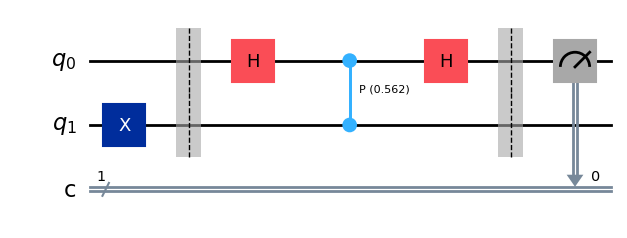

In [48]:
qc = re_circuit(angle)
qc.draw("mpl")

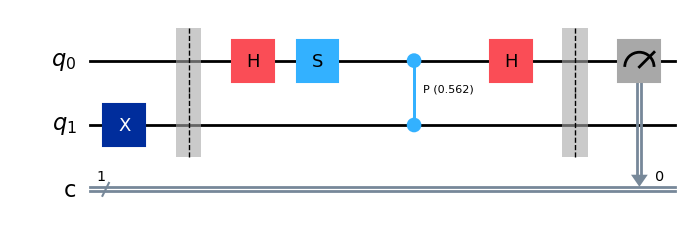

In [49]:
qc2 = im_circuit(angle)
qc2.draw("mpl")

In [50]:
backend = BasicSimulator()

num_of_shots = 10000

re_result = backend.run(qc, shots=num_of_shots).result()   
re_counts = re_result.get_counts()                    

im_result = backend.run(qc2, shots=num_of_shots).result()   
im_counts = im_result.get_counts()                

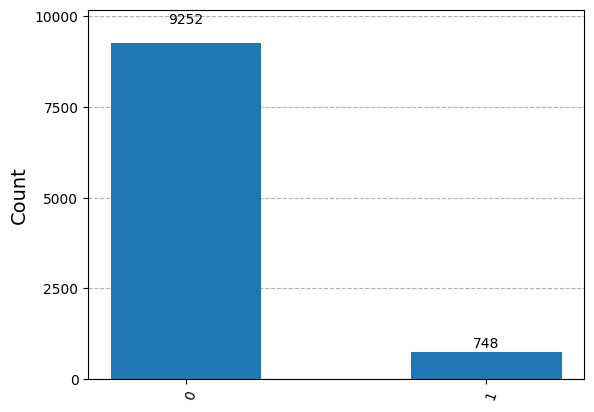

In [52]:
plot_histogram(re_counts)

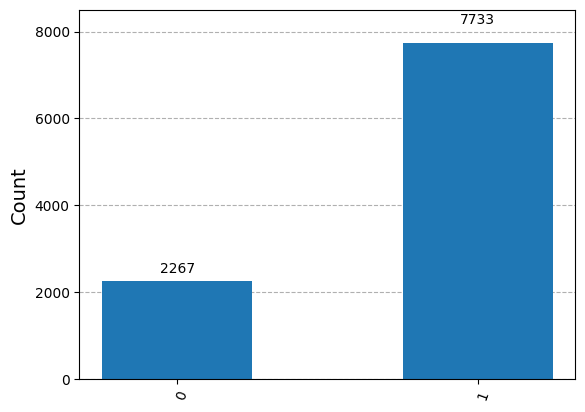

In [53]:
plot_histogram(im_counts)

Say that e^itheta = cos + i sin

show that cos^2 + sin^2 = 1

In [56]:
print('Calculated probability of measuring 1: ', 0.5*(1 - np.cos(angle*2*pi)))
print('Calculated probability of measuring 0: ',0.5*(1 + np.cos(angle*2*pi)))
print('Probability of measuring 1', re_counts['1']/num_of_shots)
print('Probability of measuring 0', re_counts['0']/num_of_shots)

Calculated probability of measuring 1:  0.9619397662556435
Calculated probability of measuring 0:  0.038060233744356575
Probability of measuring 1 0.0748
Probability of measuring 0 0.9252


3.3 math

(we could just graph sin^2 + cos^2 instead of running a bunch of trials)

<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
C:\Users\paulb\AppData\Local\Temp\ipykernel_6372\2156820398.py:24: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Angle $\phi$ (radians)')


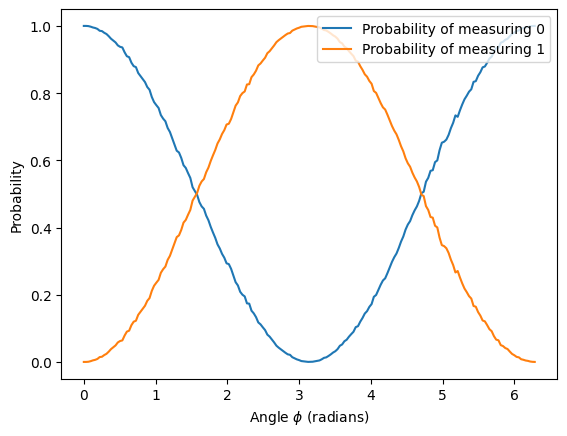

In [57]:
backend = BasicSimulator()

angles = np.linspace(0, 2*pi, 200)
prob0 = []
prob1 = []
expected_phi = angles
for ang in angles:
    circ = recircuit(ang)
    num_of_shots = int(num_of_shots)
    counts = backend.run(circ, shots=num_of_shots).result().get_counts()
    prob0val = counts.get('0')
    prob1val = counts.get('1')
    if prob0val is not None and prob1val is not None:        
        prob0.append(counts['0']/num_of_shots)
        prob1.append(counts['1']/num_of_shots)
    elif prob0val is None:
        prob0.append(0)
        prob1.append(counts['1']/num_of_shots)
    elif prob1val is None:
        prob1.append(0)
        prob0.append(counts['0']/num_of_shots)
plt.plot(angles, prob0, label = 'Probability of measuring 0')
plt.plot(angles, prob1, label = 'Probability of measuring 1')
plt.xlabel('Angle $\phi$ (radians)')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.show()

justification of subtracting both the probablities

In [70]:
print("Results of the Trial: ")
print("  Real Circuit:  \t",re_counts)
print("  Imginary Circuit:\t",im_counts)

re_p0 = re_counts['0']/num_of_shots
re_p1 = re_counts['1']/num_of_shots
im_p0 = im_counts['0']/num_of_shots
im_p1 = im_counts['1']/num_of_shots

re = re_p0 - re_p1
#re = 1 - 2*(p1re)
#re = 2*(p0re) - 1

im = im_p1 - im_p0
#im = 2*(p1im) - 1
#im = 1 - 2*(p0im)

ans = np.arctan(im/re)

print("\nWhat we got: ", ans)
print("What we want: ", angle)

Results of the Trial: 
  Real Circuit:  	 {'0': 9252, '1': 748}
  Imginary Circuit:	 {'0': 2267, '1': 7733}

What we got:  0.5712661573968978
What we want:  0.5625


graph explainination

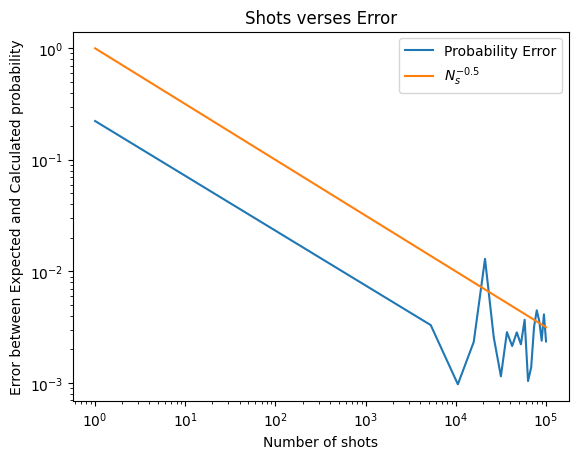

In [82]:
# Construct a graph of error verses number of shots
backend = BasicSimulator()

trials = np.linspace(1, 10**5, 20)
Ns = []
error_diff = []
for num_of_shots in trials:
    # for some reason python doesn't believe this number is an integer
    num_of_shots = int(num_of_shots)
    re_counts = backend.run(qc, shots=num_of_shots).result().get_counts() 
    im_counts = backend.run(qc2, shots=num_of_shots).result().get_counts() 

    re_p0 = re_p1 = im_p0 = im_p1 = 0
    
    if re_counts.get('0') is not None:
        re_p0 = re_counts['0']/num_of_shots
        
    if re_counts.get('1') is not None:
        re_p1 = re_counts['1']/num_of_shots
        
    if im_counts.get('0') is not None:
        im_p0 = im_counts['0']/num_of_shots
        
    if im_counts.get('1') is not None:
        im_p1 = im_counts['1']/num_of_shots

    
    re = re_p0 - re_p1
    im = im_p1 - im_p0
    ans = np.arctan(im/re)
    
    error_diff.append( abs(angle - ans) )
    Ns.append( num_of_shots**(-0.5) )
    
plt.loglog(trials, error_diff, label = 'Probability Error')
plt.loglog(trials, Ns, label = '$N_s^{-0.5}$')
plt.title("Shots verses Error")
plt.xlabel("Number of shots")
plt.ylabel("Error between Expected and Calculated probability")
plt.legend(loc='upper right')
plt.show()